In [81]:
%run '~/work/pyhton-for-the-data-scientist/Data/DVF.ipynb'

In [165]:
df_DVF=df4

# Statistique descriptive exploratoire

On cherche d'abord à manipuler les bases de données en notre possession de manière très descriptive pour tirer des premiers enseignements des données disponibles

> ## Prix constatés de DVF

On s'intéresse d'abord aux prix déclarés et disponibles sur le site de DVF (Demande de valeurs foncières). Ce sont des prix pour l'année 2021 concernant les transactions à Marseille.

In [84]:
round(df_DVF.describe(),2)

,Valeur fonciere,Surface reelle bati,Surface terrain
count,2490.00,2490.00,2490.00
mean,496234.09,71.71,271.02
std,328444.16,44.18,769.20
min,30000.00,1.00,0.00
25%,270000.00,37.00,0.00
50%,404975.00,63.00,74.00
75%,638000.00,96.75,400.00
max,2000000.00,410.00,20528.00


Notre jeu de données comporte 2745 individus. On se concentre sur 3 variables :
- La **valeur foncière** : Un bien appartement ou une maison vendu en 2021 à Marseille valait en moyenne 1 519 152€. On peut soupçonner que ce prix élevé est dû à des valeurs extrêmes, notamment en remarquant que la valeur maximale des ventes était de 15 000 000€, et en notant la forte disparité entre moyenne et médiane (450 000€ environ). La variance de la valeur foncière est énorme : les prix sont éclatés et ne suivent en effet pas du tout une loi normale.
- La **surface bâtie** : Un bien immobilier bâti vendu à Marseille en 2021 faisait en moyenne 69 $m{^2}$, et la médiane est de 59 $m{^2}$. La variance de la surface bâtie est beaucoup moins élevée que pour la valeur foncière.
- La **surface du terrain** : Les terrains vendus à Marseille en 2021 faisaient en moyenne 427 $m{^2}$. On peut soupçonner ici aussi que cette moyenne est tirée vers le haut par des valeurs extrèmes.

In [71]:
import scipy.stats.mstats as mstats

Représentons maintenant le prix moyen constaté du $m{^2}$ à la vente à Marseille en 2021 en fonction des arrondissements :

In [296]:
DVFmoy=df_DVF.groupby("Commune", as_index=False).mean(numeric_only=True)
round(DVFmoy, 2)

,Commune,Valeur fonciere,Surface reelle bati,Surface terrain
0,MARSEILLE 10EME,379440.37,53.16,144.89
1,MARSEILLE 11EME,450296.80,92.59,516.33
2,MARSEILLE 12EME,554832.93,91.26,603.85
3,MARSEILLE 13EME,393898.43,90.90,467.35
4,MARSEILLE 14EME,267443.44,73.90,327.04
5,MARSEILLE 15EME,283375.44,64.27,243.00
6,MARSEILLE 16EME,268873.62,65.80,204.32
7,MARSEILLE 1ER,763347.41,50.26,0.00
8,MARSEILLE 2EME,397568.70,57.43,18.70
9,MARSEILLE 3EME,443669.64,37.12,23.32


In [297]:
DVFmoy['sort'] = DVFmoy['Commune'].str.extract('(\d+)', expand=False).astype(int)
DVFmoy.sort_values('sort',inplace=True, ascending=True)
DVFmoy=DVFmoy.drop('sort', axis=1)
DVFmoy

,Commune,Valeur fonciere,Surface reelle bati,Surface terrain
7,MARSEILLE 1ER,763347.413793,50.258621,0.000000
8,MARSEILLE 2EME,397568.695652,57.434783,18.695652
9,MARSEILLE 3EME,443669.638889,37.122222,23.316667
10,MARSEILLE 4EME,388764.483051,55.016949,91.135593
11,MARSEILLE 5EME,557377.776699,52.223301,31.728155
12,MARSEILLE 6EME,894512.611940,51.470149,13.708955
13,MARSEILLE 7EME,760260.605042,84.319328,205.344538
14,MARSEILLE 8EME,767673.385659,89.193798,224.333333
15,MARSEILLE 9EME,606752.630573,84.050955,296.573248
0,MARSEILLE 10EME,379440.370690,53.163793,144.887931


In [298]:
DVFmoy["Prix au m2"]=DVFmoy['Valeur fonciere']/DVFmoy['Surface reelle bati']
DVFmoy=round(DVFmoy, 2)

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1600x800 with 0 Axes>

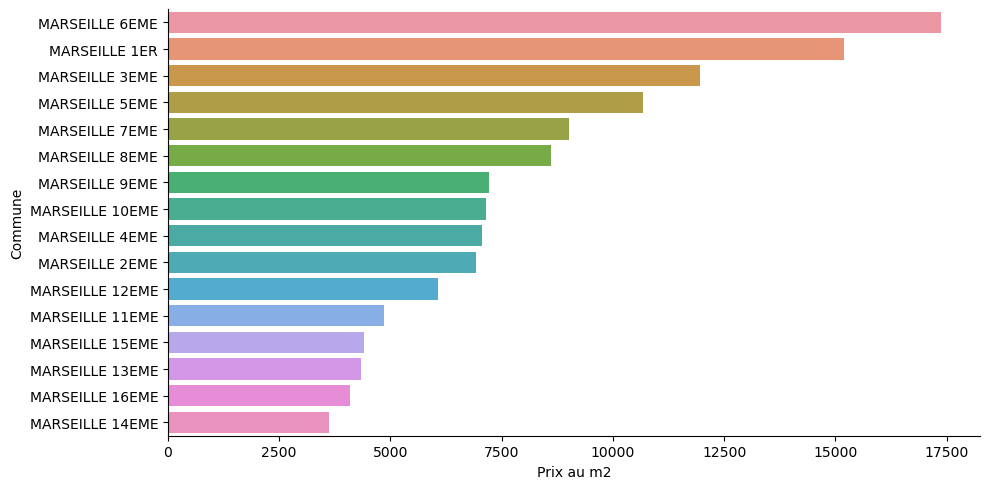

In [301]:
plt.figure(figsize=(16,8))
sns.catplot(data=DVFmoy.sort_values("Prix au m2", ascending=False), x='Prix au m2', y='Commune', kind='bar', aspect=2, legend='Prix au m2 comprenant les terrains')
plt.show()

Ainsi, les biens immobiliers construits dont le prix de vente au $m{^2}$ était lee plus élevé en 2021 se situent dans les premiers arrondissements de Marseille, en particulier le 6ème, le 1er, le 3ème et le 5ème.

> ## Analyse croisée avec les données scrappées

On cherche à déterminer si nos deux jeux de données ne se contredisent pas et sont pertinents. Pour cela, on calcule la matrice de corrélation entre les deux jeux

In [205]:
data_arrtest=pd.read_csv("~/work/pyhton-for-the-data-scientist/Data/data_arrtest.csv", 
                         dtype={'prix m2':str, 'loyer m2':str})
data_arrtest=data_arrtest.drop('loyer m2', 1)
data_arrtest

/tmp/ipykernel_1008/2781322810.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_arrtest=data_arrtest.drop('loyer m2', 1)


,Unnamed: 0,prix m2
0,Marseille 1er Arrondissement,3 610 €/m2
1,Marseille 2e Arrondissement,3 967 €/m2
2,Marseille 3e Arrondissement,2 171 €/m2
3,Marseille 4e Arrondissement,3 321 €/m2
4,Marseille 5e Arrondissement,3 784 €/m2
5,Marseille 6e Arrondissement,4 316 €/m2
6,Marseille 7e Arrondissement,5 603 €/m2
7,Marseille 8e Arrondissement,5 686 €/m2
8,Marseille 9e Arrondissement,4 529 €/m2
9,Marseille 10e Arrondissement,3 531 €/m2


In [272]:
dfmix=pd.concat([data_arrtest['prix m2'],DVFmoy['Prix au m2']], axis=1)
pd.DataFrame(dfmix)

,prix m2,Prix au m2
0,3 610 €/m2,7137.20
1,3 967 €/m2,4863.15
2,2 171 €/m2,6079.86
3,3 321 €/m2,4333.43
4,3 784 €/m2,3619.20
5,4 316 €/m2,4409.24
6,5 603 €/m2,4086.32
7,5 686 €/m2,15188.39
8,4 529 €/m2,6922.09
9,3 531 €/m2,11951.59


In [273]:
dff=pd.DataFrame(dfmix['prix m2'].str.split('€', expand=True)[0])
dff=dff.rename(columns={0:'prix m2'})

In [282]:
dfmix=pd.concat([dff,DVFmoy['Prix au m2']], axis=1)
dfmix

,prix m2,Prix au m2
0,3 610,7137.20
1,3 967,4863.15
2,2 171,6079.86
3,3 321,4333.43
4,3 784,3619.20
5,4 316,4409.24
6,5 603,4086.32
7,5 686,15188.39
8,4 529,6922.09
9,3 531,11951.59


In [283]:
corr_dfmix=.corr()
corr_dfmix

/tmp/ipykernel_1008/677006101.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_dfmix=dfmix.corr()


,Prix au m2
Prix au m2,1.0
